In [2]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df = df[df['category']=='Bowler']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 4 to 118
Data columns (total 100 columns):
player_name                 57 non-null object
category                    57 non-null object
age                         57 non-null int64
base_price                  57 non-null object
sold                        57 non-null int64
domestic                    57 non-null int64
average_all                 57 non-null int64
50s_all                     57 non-null int64
100s_all                    57 non-null int64
balls_all                   57 non-null int64
mdns_all                    57 non-null int64
runs-given_all              57 non-null int64
wkts-taken_all              57 non-null int64
average-bowl_all            57 non-null int64
CT_all                      57 non-null int64
matches_odi                 57 non-null int64
innings_odi                 57 non-null int64
not-out_odi                 57 non-null int64
runs_odi                    57 non-null int64
high-score_odi    

In [3]:
df['sold'].value_counts()

0    42
1    15
Name: sold, dtype: int64

In [4]:
df = df[['age','sold','domestic','runs-given_all','wkts-taken_all','balls_all','average-bowl_all','balls_first-class','average-bowl_first-class','runs-given_first-class','wkts-taken_first-class','matches_first-class','balls_listA','average-bowl_listA','runs-given_listA','wkts-taken_listA','matches_listA','matches_t20','balls_t20','average-bowl_t20','runs-given_t20','wkts-taken_t20']]

In [5]:
import numpy as np
df['runs-given_all'] = df['runs-given_all'].astype('float64')
df['runs-given_first-class'] = df['runs-given_first-class'].astype('float64')
df['runs-given_listA'] = df['runs-given_listA'].astype('float64')
df['runs-given_t20'] = df['runs-given_t20'].astype('float64')

In [6]:
def economy_rate(runs_given_list,balls_l):
    
    def calc_econ(runs_given,balls):
        runs_given = np.float64(runs_given)
        if balls == 0:
            return 0
        else:
            return((runs_given*6)/balls)
    
    econ_array = []
    for i in range(len(runs_given_list)):
        temp = calc_econ(runs_given_list[i],balls_l[i])
        econ_array.append(temp)
    
    return econ_array

In [7]:
economy_rate_overall = economy_rate(df['runs-given_all'].values,df['balls_all'].values)
df['economy_rate_overall'] = economy_rate_overall

In [8]:
economy_rate_listA = economy_rate(df['runs-given_listA'].values,df['balls_listA'].values)
df['economy_rate_listA'] = economy_rate_listA

In [9]:
economy_rate_first_class = economy_rate(df['runs-given_first-class'].values,df['balls_first-class'].values)
df['economy_rate_first-class'] = economy_rate_first_class

economy_rate_t20 = economy_rate(df['runs-given_t20'].values,df['balls_t20'].values)
df['economy_rate_t20'] = economy_rate_t20

In [10]:
df = df.drop(columns = ['runs-given_all','balls_all','runs-given_first-class','balls_first-class','runs-given_listA','balls_listA','runs-given_t20','balls_t20'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 4 to 118
Data columns (total 18 columns):
age                         57 non-null int64
sold                        57 non-null int64
domestic                    57 non-null int64
wkts-taken_all              57 non-null int64
average-bowl_all            57 non-null int64
average-bowl_first-class    57 non-null int64
wkts-taken_first-class      57 non-null int64
matches_first-class         57 non-null int64
average-bowl_listA          57 non-null int64
wkts-taken_listA            57 non-null int64
matches_listA               57 non-null int64
matches_t20                 57 non-null int64
average-bowl_t20            57 non-null int64
wkts-taken_t20              57 non-null int64
economy_rate_overall        57 non-null float64
economy_rate_listA          57 non-null float64
economy_rate_first-class    57 non-null float64
economy_rate_t20            57 non-null float64
dtypes: float64(4), int64(14)
memory usage: 8.5 KB


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

clf_LR = LogisticRegression(random_state = 28, max_iter = 288)
clf_DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

In [12]:
df_X = df.drop(columns = ['sold'])
df_y = df['sold']

X = df_X.values
y = df_y.values

clf_LR.fit(X,y)
clf_DT.fit(X,y)

y_true = y

y_pred_LR = clf_LR.predict(X)
y_pred_DT = clf_DT.predict(X)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 4 to 118
Data columns (total 17 columns):
age                         57 non-null int64
domestic                    57 non-null int64
wkts-taken_all              57 non-null int64
average-bowl_all            57 non-null int64
average-bowl_first-class    57 non-null int64
wkts-taken_first-class      57 non-null int64
matches_first-class         57 non-null int64
average-bowl_listA          57 non-null int64
wkts-taken_listA            57 non-null int64
matches_listA               57 non-null int64
matches_t20                 57 non-null int64
average-bowl_t20            57 non-null int64
wkts-taken_t20              57 non-null int64
economy_rate_overall        57 non-null float64
economy_rate_listA          57 non-null float64
economy_rate_first-class    57 non-null float64
economy_rate_t20            57 non-null float64
dtypes: float64(4), int64(13)
memory usage: 8.0 KB


In [14]:
from sklearn.metrics import confusion_matrix
print("confusion matrix for Logistic regression")
print (confusion_matrix(y_true,y_pred_LR))

print('confusion matrix for decision trees')
print(confusion_matrix(y_true,y_pred_DT))

confusion matrix for Logistic regression
[[39  3]
 [ 8  7]]
confusion matrix for decision trees
[[42  0]
 [ 0 15]]


In [15]:
pip install pydotplus

     |████████████████████████████████| 286kB 3.3MB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [20]:
conda install python-graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    graphviz-2.40.1            |       h0dab3d1_0         6.8 MB  conda-forge
    libtool-2.4.6              |    h14c3975_1002         512 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    python-graphviz-0.13.2     |             py_0          18 KB  conda-forge
    xorg-libxpm-3.5.12         |    h516909a_1002          

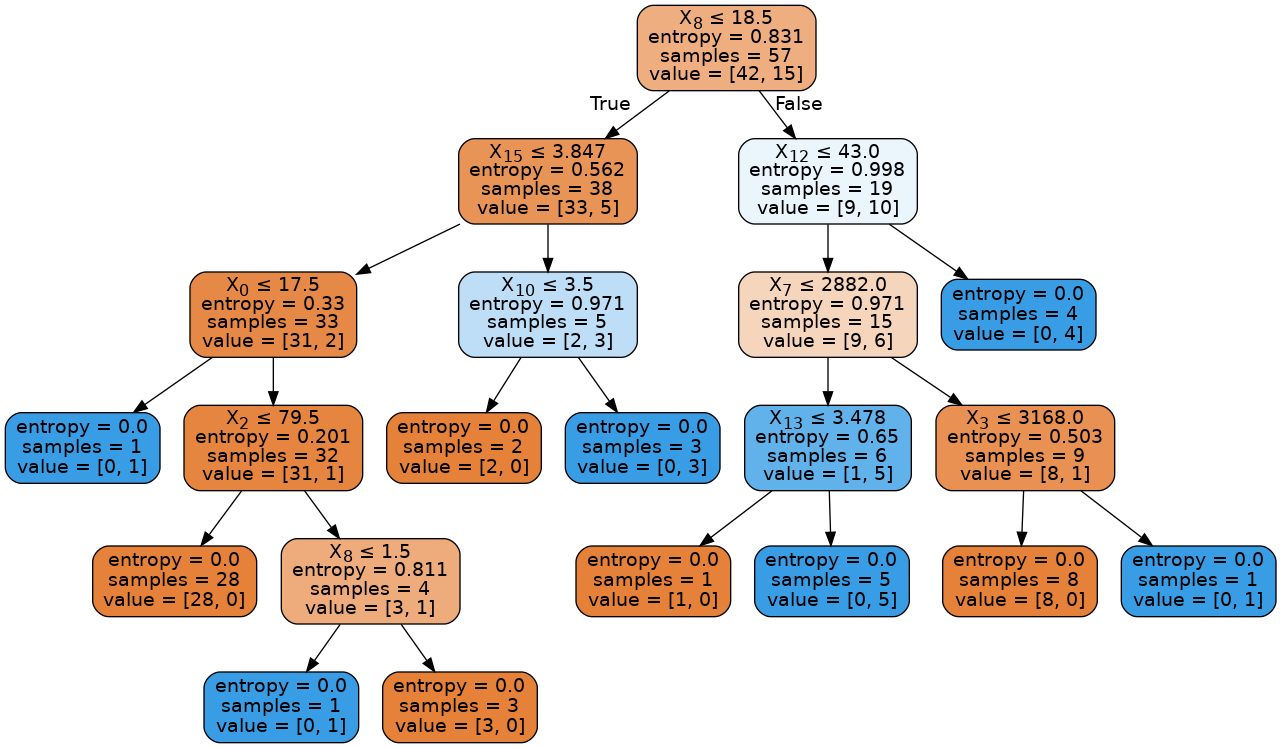

In [21]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
import collections
collections.Counter(y_test)

Counter({1: 5, 0: 7})

Test case has 5 sold cases and 7 unsold cases. Total sold cases in the data-set is 15.

In [23]:
clf_DT_1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
clf_DT_1.fit(X_train,y_train)

y_true = y_test
y_pred = clf_DT_1.predict(X_test)

print('confusion matrix for decision trees (with train and test split)')
print(confusion_matrix(y_true,y_pred))

confusion matrix for decision trees (with train and test split)
[[6 1]
 [2 3]]


In [24]:
clf_LR_1 = LogisticRegression(random_state = 28, max_iter = 288)
clf_LR_1.fit(X_train,y_train)

y_true = y_test
y_pred = clf_LR_1.predict(X_test)

print('confusion matrix for lOGISTIC REGRESSION (with train and test split)')
print(confusion_matrix(y_true,y_pred))

confusion matrix for lOGISTIC REGRESSION (with train and test split)
[[7 0]
 [5 0]]


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


end of bowler's analysis

In [26]:
df = pd.read_csv('dataset.csv')
df = df[df['category']=='Batsman']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 76
Data columns (total 100 columns):
player_name                 50 non-null object
category                    50 non-null object
age                         50 non-null int64
base_price                  50 non-null object
sold                        50 non-null int64
domestic                    50 non-null int64
average_all                 50 non-null int64
50s_all                     50 non-null int64
100s_all                    50 non-null int64
balls_all                   50 non-null int64
mdns_all                    50 non-null int64
runs-given_all              50 non-null int64
wkts-taken_all              50 non-null int64
average-bowl_all            50 non-null int64
CT_all                      50 non-null int64
matches_odi                 50 non-null int64
innings_odi                 50 non-null int64
not-out_odi                 50 non-null int64
runs_odi                    50 non-null int64
high-score_odi     

In [27]:
df = df[df['matches_ipl'] == 0]
df= df[['age','sold','domestic','average_all','innings_first-class','runs_first-class','average_first-class','innings_listA','runs_listA','average_listA','innings_t20','runs_t20','average_t20']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 75
Data columns (total 13 columns):
age                    40 non-null int64
sold                   40 non-null int64
domestic               40 non-null int64
average_all            40 non-null int64
innings_first-class    40 non-null int64
runs_first-class       40 non-null int64
average_first-class    40 non-null int64
innings_listA          40 non-null int64
runs_listA             40 non-null int64
average_listA          40 non-null int64
innings_t20            40 non-null int64
runs_t20               40 non-null int64
average_t20            40 non-null int64
dtypes: int64(13)
memory usage: 4.4 KB


In [43]:
df['sold'].value_counts()

0    25
1    15
Name: sold, dtype: int64

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

clf_LR = LogisticRegression(random_state = 28, max_iter = 288)
clf_DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

In [45]:
df_X = df.drop(columns = ['sold'])
df_y = df['sold']

X = df_X.values
y = df_y.values

clf_LR.fit(X,y)
clf_DT.fit(X,y)

y_true = y

y_pred_LR = clf_LR.predict(X)
y_pred_DT = clf_DT.predict(X)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 75
Data columns (total 12 columns):
age                    40 non-null int64
domestic               40 non-null int64
average_all            40 non-null int64
innings_first-class    40 non-null int64
runs_first-class       40 non-null int64
average_first-class    40 non-null int64
innings_listA          40 non-null int64
runs_listA             40 non-null int64
average_listA          40 non-null int64
innings_t20            40 non-null int64
runs_t20               40 non-null int64
average_t20            40 non-null int64
dtypes: int64(12)
memory usage: 4.1 KB


In [ ]:
from sklearn.metrics import confusion_matrix
print("confusion matrix for Logistic regression")
print (confusion_matrix(y_true,y_pred_LR))

print('confusion matrix for decision trees')
print(confusion_matrix(y_true,y_pred_DT))